In [1]:
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import librosa
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# %matplotlib notebook 
%matplotlib inline

读取一段音频，听取录音，绘图分析，分别展示了`正常音频、空白音频、纯噪音音频`。

In [2]:
wav_data, sr = librosa.load("../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Positive/1008_Positive_male_32_cough.wav", duration=10) # 总共有三种 wave  wavefile  librosa(采样率固定，不会按照源文件设定)
# os.listdir(".")
# fs, sound = wavfile.read("../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Positive/1008_Positive_male_32_cough.wav")
wav_data.shape,sr
# sound.shape,fs

((144884,), 22050)

In [3]:
ipd.Audio(wav_data,rate = sr)
# ipd.Audio(sound,rate = fs)

展示了数据中正常、空数据、噪音的波形图

In [4]:
wav_data, sr = librosa.load("../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Positive/1133_Positive_male_49_cough.wav", duration=10) # 总共有三种 wave  wavefile  librosa(采样率固定，不会按照源文件设定)
# 不同数据所绘制的语谱图不同，其中还可能出现为空的情况，此时需要语音分割
ipd.Audio(wav_data,rate = sr)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '语谱图')

D:\acaconda\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.51627560e-12, 1.43682367e-12, 4.71777480e-13],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.97756971e-10, 1.33823359e-12, 8.71565774e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.04480816e-09, 2.03447092e-11, 3.42836848e-11],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.59424547e-18, 2.91029741e-18, 2.15714835e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.56861971e-19, 6.88067031e-20, 6.58325633e-20],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.68856692e-21, 1.58879903e-20, 1.45445523e-21]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

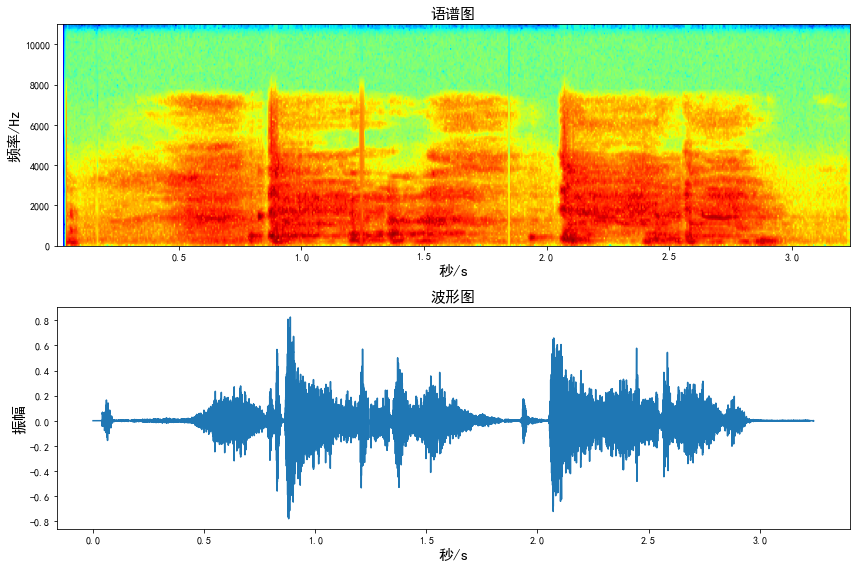

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.title("语谱图", fontsize=15)
plt.specgram(wav_data, Fs=sr, cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(212)
plt.title("波形图", fontsize=15)
time = np.arange(0, len(wav_data)) * (1.0 / sr)
plt.plot(time, wav_data)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

添加白噪声 **封装函数**，封装了能够产生特定信噪比的加噪数据，SNR(`signal noise ratio`)，为$SNR = 10*log_{10}(Ps/Pn)$，根据该公式得到$ Pn=\sqrt{\frac{S^2}{10^{\frac{SNR}{10}}}}$，高斯分布（0~1）乘上该噪声强度。噪声系数 k (根据公式 从原语言中按照给定信噪比添加符合高斯分布的噪声)

In [6]:
# 添加高斯白噪声
def add_noise(x, snr):
    """
    :param x:纯净语音
    :param snr: 信噪比
    :return: 生成执行信噪比的带噪语音（不能单纯的是高斯噪声），信噪比是根据当前信号强度决定的噪声强度
    """
    P_signal = np.mean(x**2)    # 信号功率
    k = np.sqrt(P_signal / 10 ** (snr / 10.0))  # 噪声系数 k (根据公式 从原语言中按照给定信噪比添加符合高斯分布的噪声)
    return x + np.random.randn(len(x)) * k  # 高斯噪声乘上系数

# 添加高斯白噪声
def add_noise_test(x, snr):
    """
    :return: 生成高斯噪声,如果单纯的添加高斯噪声，不确定信噪比，较难控制噪声的程度
    """
    return x + np.random.randn(len(x)) * 0.1
# 高斯噪声乘上系数
Augmentation = add_noise(x=wav_data, snr=30)
Augmentation_test = add_noise_test(x=wav_data, snr=30)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '语谱图')

D:\acaconda\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.51627560e-12, 1.43682367e-12, 4.71777480e-13],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.97756971e-10, 1.33823359e-12, 8.71565774e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.04480816e-09, 2.03447092e-11, 3.42836848e-11],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.59424547e-18, 2.91029741e-18, 2.15714835e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.56861971e-19, 6.88067031e-20, 6.58325633e-20],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.68856692e-21, 1.58879903e-20, 1.45445523e-21]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

<AxesSubplot:>

Text(0.5, 1.0, '语谱图（加噪）')

(array([[1.12702348e-10, 8.09284713e-10, 8.04690863e-10, ...,
         1.10298474e-10, 7.26891500e-10, 3.35083618e-10],
        [4.09709283e-10, 2.60315205e-12, 1.34020556e-09, ...,
         1.36187990e-09, 5.14290104e-10, 7.01273032e-10],
        [1.50680461e-11, 1.44713315e-09, 1.95975466e-10, ...,
         7.55544484e-10, 3.71878004e-10, 1.60788216e-09],
        ...,
        [4.28465586e-10, 2.28627594e-10, 2.86616747e-09, ...,
         7.80431816e-10, 5.16932138e-10, 2.22589139e-09],
        [1.11680784e-10, 6.22566189e-10, 1.03389430e-09, ...,
         3.11008822e-10, 1.18580423e-10, 1.67859013e-09],
        [1.34373413e-12, 1.51240898e-10, 6.30298903e-12, ...,
         7.09571747e-12, 3.58686770e-10, 4.29557513e-14]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图（加噪）')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

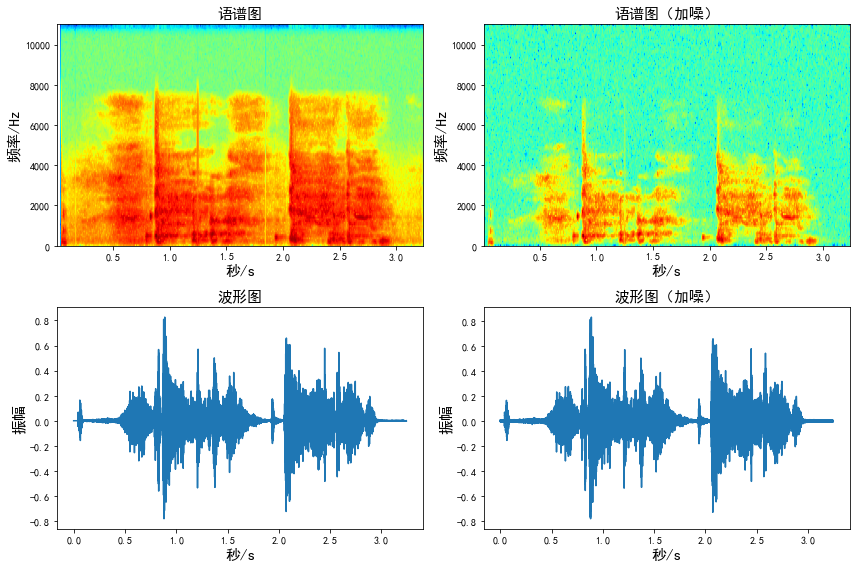

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.title("语谱图", fontsize=15)
plt.specgram(wav_data, Fs=sr, scale_by_freq=True, sides='default', cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(2, 2, 3)
plt.title("波形图", fontsize=15)
time = np.arange(0, len(wav_data)) * (1.0 / sr)
plt.plot(time, wav_data)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

plt.subplot(2, 2, 2)
plt.title("语谱图（加噪）", fontsize=15)
plt.specgram(Augmentation, Fs=sr, scale_by_freq=True, sides='default', cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(2, 2, 4)
plt.title("波形图（加噪）", fontsize=15)
time = np.arange(0, len(Augmentation)) * (1.0 / sr)
plt.plot(time, Augmentation)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

In [8]:
ipd.Audio(wav_data,rate = sr)
ipd.Audio(Augmentation,rate = sr)
ipd.Audio(Augmentation_test,rate = sr)

 **封装函数**，音量增强，这一段代码计算了一个标量（scalar），以便将输入信号的音量增益到所需的分贝级别。它使用了dB参数表示的增益量，并且通过wav参数传递的音频信号来计算输入信号的平均功率（wav_p）。

在计算标量时，使用了以下公式：

scalar = sqrt(10**(dB/10) / (wav_p + eps))

其中，dB/10将dB值转换为增益因子，10的幂将增益因子转换为增益比，sqrt表示平方根函数，eps是一个非常小的数，用于避免除以零错误。公式的目的是计算一个标量，使得将输入信号乘以该标量后，其平均功率就会增益到所需的分贝级别。

In [9]:
# 音量增强
def dB_gain(wav, dB):
    """
    :param wav: 语音
    :param dB: 音量
    :return:返回以指定dB增益后的语音 
    """
    wav_p = np.mean(wav ** 2)  # 平均功率
    scalar = np.sqrt(10 ** (dB / 10) / (wav_p + np.finfo(np.float32).eps))
    wav1 = wav * scalar
    return wav1, scalar

db, db_scalar = dB_gain(wav_data, 500)    # 得到增益后的带噪语音和增益系数
db
db_scalar

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -2.2865600e+23, -2.3777554e+23, -2.3479601e+23], dtype=float32)

1.0987035996512373e+26

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '语谱图')

D:\acaconda\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.51627560e-12, 1.43682367e-12, 4.71777480e-13],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.97756971e-10, 1.33823359e-12, 8.71565774e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.04480816e-09, 2.03447092e-11, 3.42836848e-11],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.59424547e-18, 2.91029741e-18, 2.15714835e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.56861971e-19, 6.88067031e-20, 6.58325633e-20],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.68856692e-21, 1.58879903e-20, 1.45445523e-21]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

<AxesSubplot:>

Text(0.5, 1.0, '语谱图（音量增强）')

D:\acaconda\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.83037162e+40, 1.73446104e+40, 5.69505990e+39],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.38722238e+42, 1.61544801e+40, 1.05211024e+41],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.26123969e+43, 2.45591065e+41, 4.13855348e+41],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.13110199e+34, 3.51324085e+34, 2.60376572e+33],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.89303185e+33, 8.30395569e+32, 7.94701054e+32],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.24365887e+31, 1.91864860e+32, 1.75631491e+31]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图（音量增强）')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

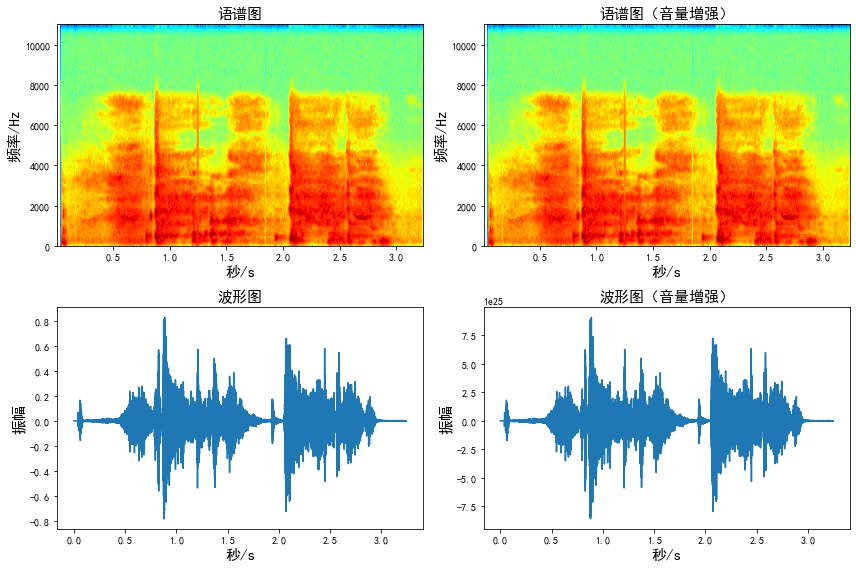

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.title("语谱图", fontsize=15)
plt.specgram(wav_data, Fs=sr, scale_by_freq=True, sides='default', cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(2, 2, 3)
plt.title("波形图", fontsize=15)
time = np.arange(0, len(wav_data)) * (1.0 / sr)
plt.plot(time, wav_data)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

plt.subplot(2, 2, 2)
plt.title("语谱图（音量增强）", fontsize=15)
plt.specgram(db, Fs=sr, scale_by_freq=True, sides='default', cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(2, 2, 4)
plt.title("波形图（音量增强）", fontsize=15)
time = np.arange(0, len(Augmentation)) * (1.0 / sr)
plt.plot(time, db)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

In [11]:
ipd.Audio(db,rate=sr)

`pitch shift`，`time stretch` 对语音信号进行音调转换和时间伸缩。并展示了对应的波形图

6.1 `pitch_shift`函数用于改变语音信号的音调，可以通过指定n_steps参数来控制转换的大小，n_steps为负数表示音调降低，为正数表示音调升高。具体而言，该函数将输入语音信号的频率轴上的**所有频率值乘以2的n_steps/12次方幂，从而实现音调的变化**。音调是声音的一个基本特征，指的是声音的高低音高。它由声波的频率决定，频率越高则音调越高，频率越低则音调越低。在音乐中，音调是指一种音符的高低，不同音调的音符在音高上相差一个半音或全音。在语音中，音调也常常被称为声调，是指一句话或一个单词中某个音节的高低声调，语言中的音调对于语义的表达和理解都有着重要的影响。

wav_data：输入的语音信号。

sr：采样率。

n_steps：音调转换的大小，单位为半音（semitones），默认为-3，表示将音调降低3个半音。

6.2 `time_stretch`函数用于改变语音信号的持续时间，可以通过指定rate参数来控制时间伸缩的大小，rate大于1表示时间伸长，rate小于1表示时间缩短。具体而言，**该函数将输入语音信号的时域轴上的采样点的时间间隔缩放为原来的1/rate倍**，从而实现时间伸缩。

wav_data：输入的语音信号。

rate：时间伸缩的大小，大于1表示时间伸长，小于1表示时间缩短，默认为1.2，表示将时间伸长20%。

In [13]:
wav_ps = librosa.effects.pitch_shift(y=wav_data, sr=sr, n_steps=-3) # 降低音调，默认降低3个半音
wav_ts = librosa.effects.time_stretch(wav_data, rate=1.2) # 伸长，默认为1.2 伸长20%

<Figure size 936x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Original waveform')

(0.0, 48500.0, -1.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Pitch Shift transformed waveform')

(0.0, 48500.0, -1.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Time Stretch transformed waveform')

(0.0, 48000.0, -1.0, 1.0)

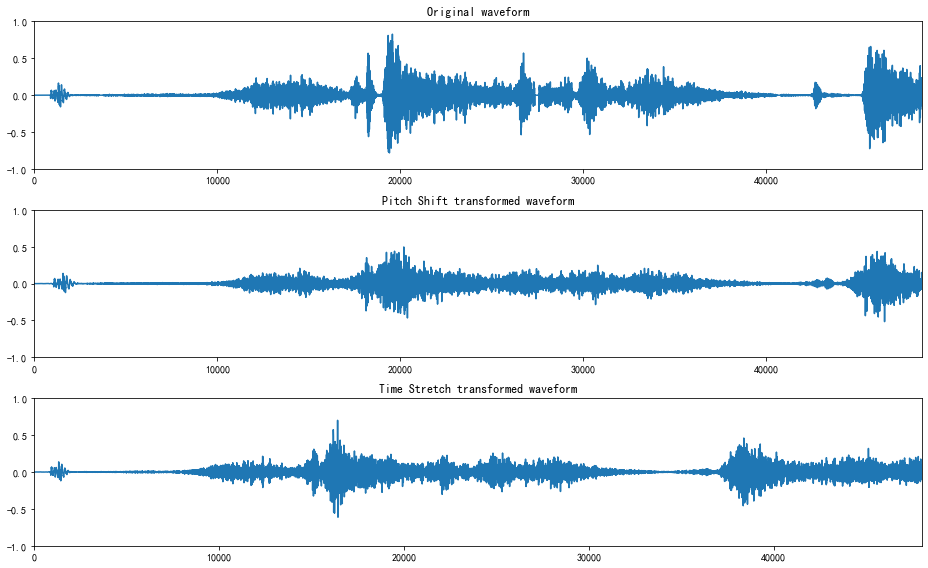

In [15]:
plt.figure(figsize=(13,8))
plt.subplot(311)
plt.plot(wav_data)
plt.title('Original waveform')
# plt.axis([0, 48500, -1, 1])
plt.subplot(312)
plt.plot(wav_ps)
plt.title('Pitch Shift transformed waveform')
# plt.axis([0, 48500, -1, 1])
plt.subplot(313)
plt.plot(wav_ts)
plt.title('Time Stretch transformed waveform')
# plt.axis([0, 48000, -1, 1])
plt.tight_layout()

In [20]:
ipd.Audio(wav_data,rate=sr) # 
ipd.Audio(wav_ps,rate=sr) # 降低音调
ipd.Audio(wav_ts,rate=sr) # 时间间隔变短

In [32]:
# 失真
import soundpy as sp

harmonic_distortion = sp.augment.harmonic_distortion(wav_data, sr=sr)
# !pip list

ipd.Audio(wav_data,rate=sr) # 
ipd.Audio(harmonic_distortion,rate=sr) # 谐波失真

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '正常')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

<AxesSubplot:>

Text(0.5, 1.0, '谐波失真')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

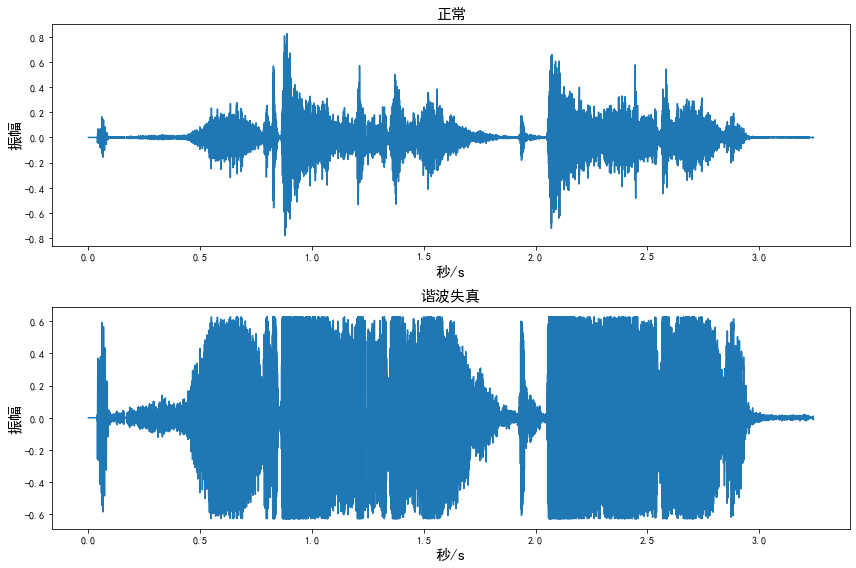

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.title("正常", fontsize=15)
time = np.arange(0, len(wav_data)) * (1.0 / sr)
plt.plot(time, wav_data)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.subplot(212)
plt.title("谐波失真", fontsize=15)
time = np.arange(0, len(harmonic_distortion)) * (1.0 / sr)
plt.plot(time, harmonic_distortion)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

封装定义时间偏移，偏移数据，反过来便是偏移时间

In [48]:
def time_shift(x, shift):
    # shift：移动的长度
    return np.roll(x, int(shift))

# Augmentation = time_shift(wav_data, shift=20000)
Augmentation = librosa.effects.time_stretch(wav_data, rate=2)

In [49]:
ipd.Audio(wav_data,rate=sr) # 
ipd.Audio(Augmentation,rate=sr) # 语速调整，升高采样率

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '语谱图')

D:\acaconda\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.51627560e-12, 1.43682367e-12, 4.71777480e-13],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.97756971e-10, 1.33823359e-12, 8.71565774e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.04480816e-09, 2.03447092e-11, 3.42836848e-11],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.59424547e-18, 2.91029741e-18, 2.15714835e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.56861971e-19, 6.88067031e-20, 6.58325633e-20],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.68856692e-21, 1.58879903e-20, 1.45445523e-21]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

<AxesSubplot:>

Text(0.5, 1.0, '语谱图（语速调整）')

(array([[1.06830126e-09, 3.51711755e-09, 3.04842011e-09, ...,
         5.21207643e-12, 1.35304977e-12, 1.14531928e-12],
        [4.68521543e-09, 2.33558195e-08, 8.67101739e-08, ...,
         5.03429948e-11, 8.67208845e-11, 1.60729335e-10],
        [5.07485859e-09, 1.76831471e-08, 6.48359937e-08, ...,
         9.98101488e-10, 1.46468369e-09, 6.71418535e-10],
        ...,
        [2.35618658e-21, 1.48931601e-21, 1.35355283e-20, ...,
         7.13870077e-17, 1.98079247e-16, 3.33514904e-17],
        [5.59571427e-22, 3.26009578e-22, 2.41275739e-23, ...,
         3.49249207e-17, 2.50196484e-17, 1.05000074e-16],
        [3.05135345e-22, 8.73748575e-24, 1.87959209e-22, ...,
         5.47903494e-19, 1.76876416e-17, 7.65461941e-17]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

Text(0.5, 0, '秒/s')

Text(0, 0.5, '频率/Hz')

<AxesSubplot:>

Text(0.5, 1.0, '波形图（语速调整）')

Text(0.5, 0, '秒/s')

Text(0, 0.5, '振幅')

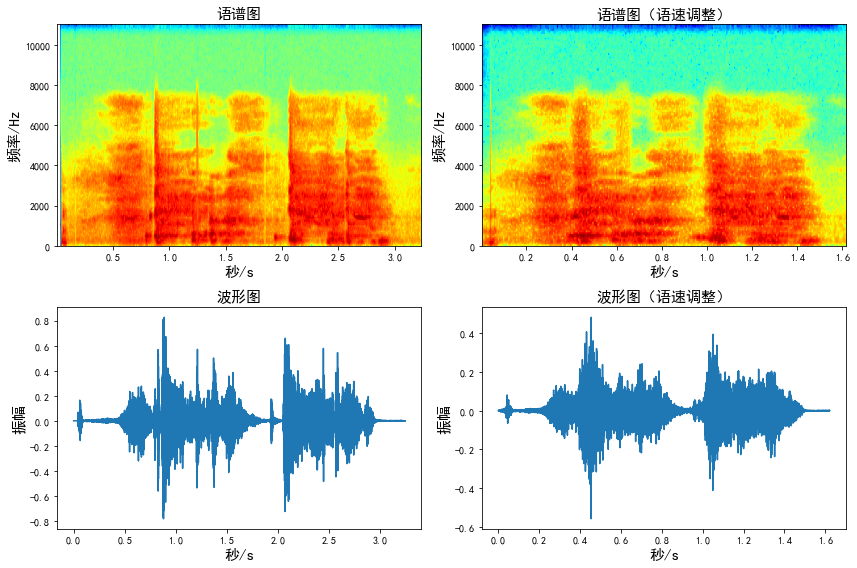

In [50]:
fs = sr
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.title("语谱图", fontsize=15)
plt.specgram(wav_data, Fs=fs, scale_by_freq=True, sides='default', cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(2, 2, 3)
plt.title("波形图", fontsize=15)
time = np.arange(0, len(wav_data)) * (1.0 / fs)
plt.plot(time, wav_data)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()

plt.subplot(2, 2, 2)
plt.title("语谱图（语速调整）", fontsize=15)
plt.specgram(Augmentation, Fs=fs, scale_by_freq=True, sides='default', cmap="jet")
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('频率/Hz', fontsize=15)

plt.subplot(2, 2, 4)
plt.title("波形图（语速调整）", fontsize=15)
time = np.arange(0, len(Augmentation)) * (1.0 / fs)
plt.plot(time, Augmentation)
plt.xlabel('秒/s', fontsize=15)
plt.ylabel('振幅', fontsize=15)

plt.tight_layout()
# plt.show()